In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [3]:
def uniform_function(d1,d2,p,m,element_type):
    
    PD = 2
    q = np.array([[0,0],[d1,0],[0,d2],[d1,d2]])
    NoN = (p+1)*(m+1)
    NoE = p*m
    NPE = 4
    NL = np.zeros([NoN, PD])
    a = (q[1,0]-q[0,0])/p
    b = (q[2,1]-q[0,1])/m
    n = 0
    for i in range(1,m+2):
        for j in range(1,p+2):
            NL[n,0] = q[0,0]+(j-1)*a
            NL[n,1] = q[0,1]+(i-1)*b
            n+=1
    EL = np.zeros([NoE,NPE])
    for i in range(1,m+1):
        for j in range(1,p+1):
            if j == 1:
                
                EL[(i-1)*p+j-1,0] = ((i-1)*(p+1) + j)
                EL[(i-1)*p+j-1,1] = (EL[(i-1)*p+j-1,0] + 1)
                EL[(i-1)*p+j-1,3] = (EL[(i-1)*p+j-1,0] + (p+1))
                EL[(i-1)*p+j-1,2] = (EL[(i-1)*p+j-1,3] +1)
            else:
                EL[(i-1)*p+j-1,0] = (EL[(i-1)*p+j-2,1])
                EL[(i-1)*p+j-1,3] = (EL[(i-1)*p+j-2,2])
                EL[(i-1)*p+j-1,1] = (EL[(i-1)*p+j-1,0] + 1)
                EL[(i-1)*p+j-1,2] = (EL[(i-1)*p+j-1,3] + 1)
    if element_type == 'D2TR3N':
        NPEn = 3
        NoEn = NoE*2
        ELn = np.zeros([NoEn,NPEn])
        for i in range(1,NoE+1):
            ELn[2*(i-1),0] = EL[i-1,0]
            ELn[2*(i-1),1] = EL[i-1,1]
            ELn[2*(i-1),2] = EL[i-1,2]
            
            ELn[2*(i-1)+1,0] = EL[i-1,0]
            ELn[2*(i-1)+1,1] = EL[i-1,2]
            ELn[2*(i-1)+1,2] = EL[i-1,3]
        EL = ELn
        
    EL = EL.astype(int)
    return NL, EL


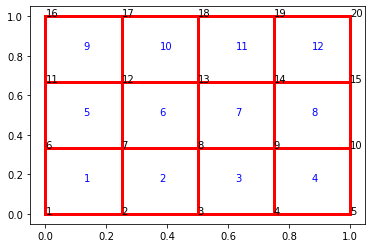

In [4]:
d1 = 1
d2 = 1
p = 4
m = 3

element_type = "D2QU4N"
NL, EL = uniform_function(d1,d2,p,m,element_type)
NoN = np.size(NL,0)
NoE = np.size(EL,0)
plt.figure(1)

count = 1
for i in range(0,NoN):
    plt.annotate(count,xy = (NL[i,0],NL[i,1]))
    count +=1
if element_type == 'D2QU4N':
    count2 = 1
    for j in range(0,NoE):
        plt.annotate(count2,xy = ((NL[int(EL[j,0])-1,0]+NL[int(EL[j,1])-1,0]+NL[int(EL[j,2])-1,0]+NL[int(EL[j,3])-1,0])/4,(NL[int(EL[j,0])-1,1]+NL[int(EL[j,1])-1,1]+NL[int(EL[j,2])-1,1]+NL[int(EL[j,3])-1,1])/4),c = 'blue')
        count2 += 1
    x0, y0 = NL[EL[:,0]-1,0], NL[EL[:,0]-1,1]
    x1, y1 = NL[EL[:,1]-1,0], NL[EL[:,1]-1,1]
    x2, y2 = NL[EL[:,2]-1,0], NL[EL[:,2]-1,1]
    x3, y3 = NL[EL[:,3]-1,0], NL[EL[:,3]-1,1]
    
    plt.plot(np.array([x0,x1]),np.array([y0,y1]),'red',linewidth=3)
    plt.plot(np.array([x1,x2]),np.array([y1,y2]),'red',linewidth=3)
    plt.plot(np.array([x2,x3]),np.array([y2,y3]),'red',linewidth=3)
    plt.plot(np.array([x3,x0]),np.array([y3,y0]),'red',linewidth=3)


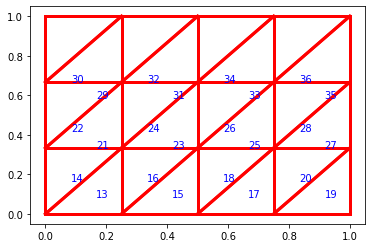

In [5]:
element_type = 'D2TR3N'
NL, EL = uniform_function(d1,d2,p,m,element_type)
if element_type == 'D2TR3N':
    NPEn = 3
    for j in range(0,NoE*2):
        plt.annotate(count2,xy = ((NL[EL[j,0]-1,0]+NL[EL[j,1]-1,0]+NL[EL[j,2]-1,0])/3,(NL[EL[j,0]-1,1]+NL[EL[j,1]-1,1]+NL[EL[j,2]-1,1])/4),c = 'blue')
        count2 += 1
    x0, y0 = NL[EL[:,0]-1,0], NL[EL[:,0]-1,1]
    x1, y1 = NL[EL[:,1]-1,0], NL[EL[:,1]-1,1]
    x2, y2 = NL[EL[:,2]-1,0], NL[EL[:,2]-1,1]
    plt.plot(np.array([x0,x1]),np.array([y0,y1]),'red',linewidth=3)
    plt.plot(np.array([x1,x2]),np.array([y1,y2]),'red',linewidth=3)
    plt.plot(np.array([x2,x0]),np.array([y2,y0]),'red',linewidth=3)
    plt.plot